In [21]:
import pandas as pd
import sqlite3
import contextlib 

In [22]:
sql_connect = sqlite3.connect('../database.sqlite')
cursor = sql_connect.cursor()

Alle tabellen inladen en analyseren

In [23]:
tables = pd.read_sql("""SELECT *
                     FROM sqlite_master
                     WHERE type='table';
                     """, sql_connect)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


***Beschikbare Tabellen***

- Country
- League
- Match
- Team
- Team_Attributes
- Player
- Player_Attributes

In [24]:
countries = pd.read_sql("""SELECT *
                        FROM Country;
                        """, sql_connect)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [25]:
leagues = pd.read_sql("""SELECT *
                      FROM League
                      JOIN Country
                      USING (id);
                      """, sql_connect)
leagues

,id,country_id,name,name
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


In [26]:
matches = pd.read_sql("""SELECT *
                      FROM Match;
                      """, sql_connect)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [27]:
teams = pd.read_sql("""SELECT *
                    FROM Team;
                    """, sql_connect)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [28]:
team_attributes = pd.read_sql("""SELECT * 
                              FROM Team as t
                              JOIN Team_Attributes as ta  
                              USING (team_api_id);""", sql_connect)
team_attributes.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,2010-02-22 00:00:00,60,Balanced,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,2014-09-19 00:00:00,52,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,2015-09-10 00:00:00,47,Balanced,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,2010-02-22 00:00:00,70,Fast,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,2011-02-22 00:00:00,47,Balanced,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [29]:
players = pd.read_sql("""SELECT *
                      FROM Player
                      ;""", sql_connect)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [30]:
player_attributes = pd.read_sql("""SELECT * 
                              FROM Player as p
                              JOIN Player_Attributes as pa
                              USING (player_api_id, player_fifa_api_id )
                              LIMIT 5;""", sql_connect)
player_attributes

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,2016-02-18 00:00:00,67,...,54,48,65,69,69,6,11,10,8,8
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,2015-11-19 00:00:00,67,...,54,48,65,69,69,6,11,10,8,8
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,2015-09-21 00:00:00,62,...,54,48,65,66,69,6,11,10,8,8
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,2015-03-20 00:00:00,61,...,53,47,62,63,66,5,10,9,7,7
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,2007-02-22 00:00:00,61,...,53,47,62,63,66,5,10,9,7,7


Belangrijkste indentifiers Manchester United

Analyseren seizoen 2012/2013

In [31]:
all_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        ht.team_long_name AS  home_team,
                                        at.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS ht on ht.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team at on at.team_api_id = Match.away_team_api_id                              
                                ORDER by date;""", sql_connect)
all_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0
...,...,...,...,...,...,...,...,...,...,...
25974,25945,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Basel,Grasshopper Club Zürich,0,1
25975,25946,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,Lugano,FC St. Gallen,3,0
25976,25947,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Luzern,FC Sion,2,2
25977,25948,Switzerland,Switzerland Super League,2015/2016,36,2016-05-25 00:00:00,FC Thun,BSC Young Boys,0,3


In [32]:
def select_season(df, country_name, season):
    """_summary_

    Parameters
    ----------
    df : DataFrame
        _description_
    country_name : str
        _description_
    season : str
        _description_

    Returns
    -------
    DataFrame
        u wot mate
    """    
    result = df[(df["country_name"] == country_name) & (df["season"] == season)]
    return result

season_matches = select_season(all_matches, 'Germany', '2010/2011')
season_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
6684,8421,Germany,Germany 1. Bundesliga,2010/2011,1,2010-08-20 00:00:00,FC Bayern Munich,VfL Wolfsburg,2,1
6707,8422,Germany,Germany 1. Bundesliga,2010/2011,1,2010-08-21 00:00:00,TSG 1899 Hoffenheim,SV Werder Bremen,4,1
6708,8423,Germany,Germany 1. Bundesliga,2010/2011,1,2010-08-21 00:00:00,Borussia Mönchengladbach,1. FC Nürnberg,1,1
6709,8424,Germany,Germany 1. Bundesliga,2010/2011,1,2010-08-21 00:00:00,1. FC Köln,1. FC Kaiserslautern,1,3
6710,8425,Germany,Germany 1. Bundesliga,2010/2011,1,2010-08-21 00:00:00,SC Freiburg,FC St. Pauli,1,3
...,...,...,...,...,...,...,...,...,...,...
9657,8668,Germany,Germany 1. Bundesliga,2010/2011,34,2011-05-14 00:00:00,Hamburger SV,Borussia Mönchengladbach,1,1
9658,8669,Germany,Germany 1. Bundesliga,2010/2011,34,2011-05-14 00:00:00,1. FSV Mainz 05,FC St. Pauli,2,1
9659,8670,Germany,Germany 1. Bundesliga,2010/2011,34,2011-05-14 00:00:00,1. FC Köln,FC Schalke 04,2,1
9660,8671,Germany,Germany 1. Bundesliga,2010/2011,34,2011-05-14 00:00:00,SC Freiburg,Bayer 04 Leverkusen,0,1


In [33]:
def decide_winner(team1_goals, team2_goals):
    """This function can be used to show which team won the match and which one lost

    Parameters
    ----------
    team1_goals : int
        the amount of goals scored by the first team
    team2_goals : int
        the amount of goals scored by the second team

    Returns
    -------
    String
        A string is returned to show whether team1 won or lost
    """    
    if team1_goals > team2_goals:
        return 'Win'
    elif team1_goals == team2_goals:
        return 'Draw'
    else:
        return 'Loss'

In [34]:
all_matches_goals = season_matches[["home_team", "away_team", "home_team_goal", "away_team_goal"]]
all_matches_goals

,home_team,away_team,home_team_goal,away_team_goal
6684,FC Bayern Munich,VfL Wolfsburg,2,1
6707,TSG 1899 Hoffenheim,SV Werder Bremen,4,1
6708,Borussia Mönchengladbach,1. FC Nürnberg,1,1
6709,1. FC Köln,1. FC Kaiserslautern,1,3
6710,SC Freiburg,FC St. Pauli,1,3
...,...,...,...,...
9657,Hamburger SV,Borussia Mönchengladbach,1,1
9658,1. FSV Mainz 05,FC St. Pauli,2,1
9659,1. FC Köln,FC Schalke 04,2,1
9660,SC Freiburg,Bayer 04 Leverkusen,0,1


In [35]:
# Meer variabelen? nieuwe kolomnamen zouden hier ook bij kunnen, maar is niet per se nuttig

def season_results(df):
    """_summary_

    Parameters
    ----------
    df : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """    
    result_hometeam = []
    result_awayteam = []

    for index, col in df.iterrows():
        goals_thuis = col['home_team_goal']
        goals_uit = col['away_team_goal']
        
        result_hometeam.append(decide_winner(goals_thuis, goals_uit))
        result_awayteam.append(decide_winner(goals_uit, goals_thuis))

    season_results_df = pd.DataFrame({
        'Thuisteam': df['home_team'],
        'Uitteam': df['away_team'],
        'Thuisteam_doelpunten': df['home_team_goal'],
        'Uitteam_doelpunten': df['away_team_goal'],
        'Uitkomst_thuisteam': result_hometeam,
        'Uitkomst_uitteam': result_awayteam
    })

    return season_results_df

all_matches_results = season_results(all_matches_goals)
all_matches_results

,Thuisteam,Uitteam,Thuisteam_doelpunten,Uitteam_doelpunten,Uitkomst_thuisteam,Uitkomst_uitteam
6684,FC Bayern Munich,VfL Wolfsburg,2,1,Win,Loss
6707,TSG 1899 Hoffenheim,SV Werder Bremen,4,1,Win,Loss
6708,Borussia Mönchengladbach,1. FC Nürnberg,1,1,Draw,Draw
6709,1. FC Köln,1. FC Kaiserslautern,1,3,Loss,Win
6710,SC Freiburg,FC St. Pauli,1,3,Loss,Win
...,...,...,...,...,...,...
9657,Hamburger SV,Borussia Mönchengladbach,1,1,Draw,Draw
9658,1. FSV Mainz 05,FC St. Pauli,2,1,Win,Loss
9659,1. FC Köln,FC Schalke 04,2,1,Win,Loss
9660,SC Freiburg,Bayer 04 Leverkusen,0,1,Loss,Win


In [36]:
# Home team wins & points

def calc_points(df, name_col, count_col):
    """A function to calcutale how often each team scored and subsequently used that information to calculate the points they get for those wins / losses

    Parameters
    ----------
    df : DataFrame
        A dataframe which you want to use for the calculation
    name_col : str
        The column you want to use as filter for the calcutation, the new dataframe is grouped by this column
    count_col : str
        the column of wich you wish to count the values and base the new column's score on

    Returns
    -------
    DataFrame
        A new dataframe is returned which shows the wins, draws, losses and total points per value of the name_col
    """    

    count_score = df.groupby(name_col)[count_col].value_counts()
    calc_points_df = pd.DataFrame(count_score).unstack(count_col).fillna(0)['count'][['Win', 'Draw', 'Loss']]

    calc_points_df['Total Points'] = calc_points_df['Win'] * 3 + calc_points_df['Draw'] * 1

    calc_points_df = calc_points_df.sort_values('Total Points', ascending=False) 

    return calc_points_df

In [37]:
hometeam_points = calc_points(all_matches_results, 'Thuisteam', 'Uitkomst_thuisteam')

hometeam_points.head()

Uitkomst_thuisteam,Win,Draw,Loss,Total Points
Thuisteam,,,,
FC Bayern Munich,13,2,2,41
Borussia Dortmund,12,4,1,40
Hannover 96,12,1,4,37
1. FC Köln,11,2,4,35
Bayer 04 Leverkusen,9,5,3,32


In [38]:
awayteam_points = calc_points(all_matches_results, 'Uitteam', 'Uitkomst_uitteam')

awayteam_points.head()

Uitkomst_uitteam,Win,Draw,Loss,Total Points
Uitteam,,,,
Bayer 04 Leverkusen,11,3,3,36
Borussia Dortmund,11,2,4,35
1. FSV Mainz 05,10,2,5,32
FC Bayern Munich,6,6,5,24
Hannover 96,7,2,8,23


In [39]:
total_team_points = (hometeam_points + awayteam_points).sort_values('Total Points', ascending=False).rename_axis('Team')

total_team_points.columns.name = None

total_team_points


,Win,Draw,Loss,Total Points
Team,,,,
Borussia Dortmund,23,6,5,75
Bayer 04 Leverkusen,20,8,6,68
FC Bayern Munich,19,8,7,65
Hannover 96,19,3,12,60
1. FSV Mainz 05,18,4,12,58
1. FC Nürnberg,13,8,13,47
1. FC Kaiserslautern,13,7,14,46
Hamburger SV,12,9,13,45
SC Freiburg,13,5,16,44


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
def plot_decorator(func):
    def wrapper(*args, **kwargs):
        sns.set_theme(palette='colorblind', style='darkgrid')
        result = func(*args, **kwargs)
        plt.show()

        return result

    return wrapper

@plot_decorator
def create_plot(df, type, x_axis, y_axis, title):
    plot = sns.catplot(
        data=df,
        kind=type,
        x=x_axis,
        y=y_axis,
        aspect=1.25
    )
    plt.title(title)
    return plot

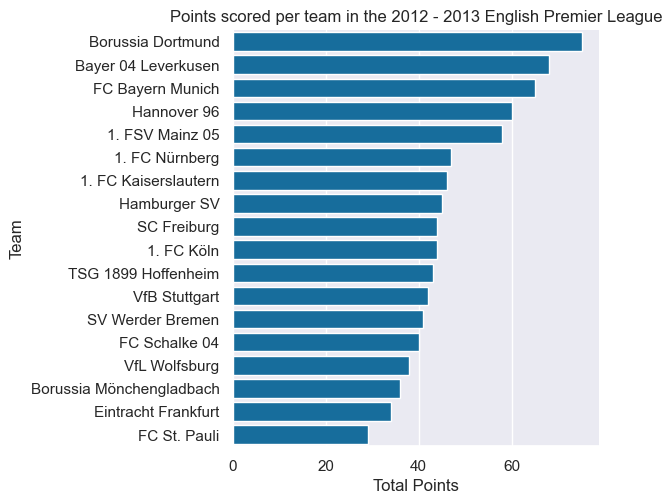

In [43]:
all_matches_plot = create_plot(df=total_team_points, 
                          type='bar', 
                          x_axis='Total Points', 
                          y_axis='Team',
                          title='Points scored per team in the 2012 - 2013 English Premier League')